In [39]:
import urllib, json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [40]:
df.head()

year                       title  rating    imdbid    id
0  1874            Passage de Venus       0   3155794  9602
1  1877           La Rosace Magique       0  14495706  9804
2  1878  Sallie Gardner at a Gallop       0   2221420  9603
3  1878           Le singe musicien       0  12592084  9806
4  1881     Athlete Swinging a Pick       0   7816420  9816

In [41]:
df.describe()

year        rating            id
count  10289.000000  10289.000000  10289.000000
mean    1996.780251      2.134901   5497.199436
std       25.076609      1.099128   3220.511255
min     1874.000000      0.000000      1.000000
25%     1988.000000      1.000000   2683.000000
50%     2006.000000      3.000000   5458.000000
75%     2014.000000      3.000000   8308.000000
max     2024.000000      3.000000  11363.000000

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10289 entries, 0 to 10288
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    10289 non-null  int64 
 1   title   10289 non-null  object
 2   rating  10289 non-null  int64 
 3   imdbid  10289 non-null  object
 4   id      10289 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 402.0+ KB


In [43]:
df.isnull().sum()
#there are no missing values

year      0
title     0
rating    0
imdbid    0
id        0
dtype: int64

In [44]:
plt.figure(figsize=(150,20))
sns.countplot(x='year', hue='rating', data = df)

<Axes: xlabel='year', ylabel='count'>

<Axes: xlabel='rating', ylabel='count'>

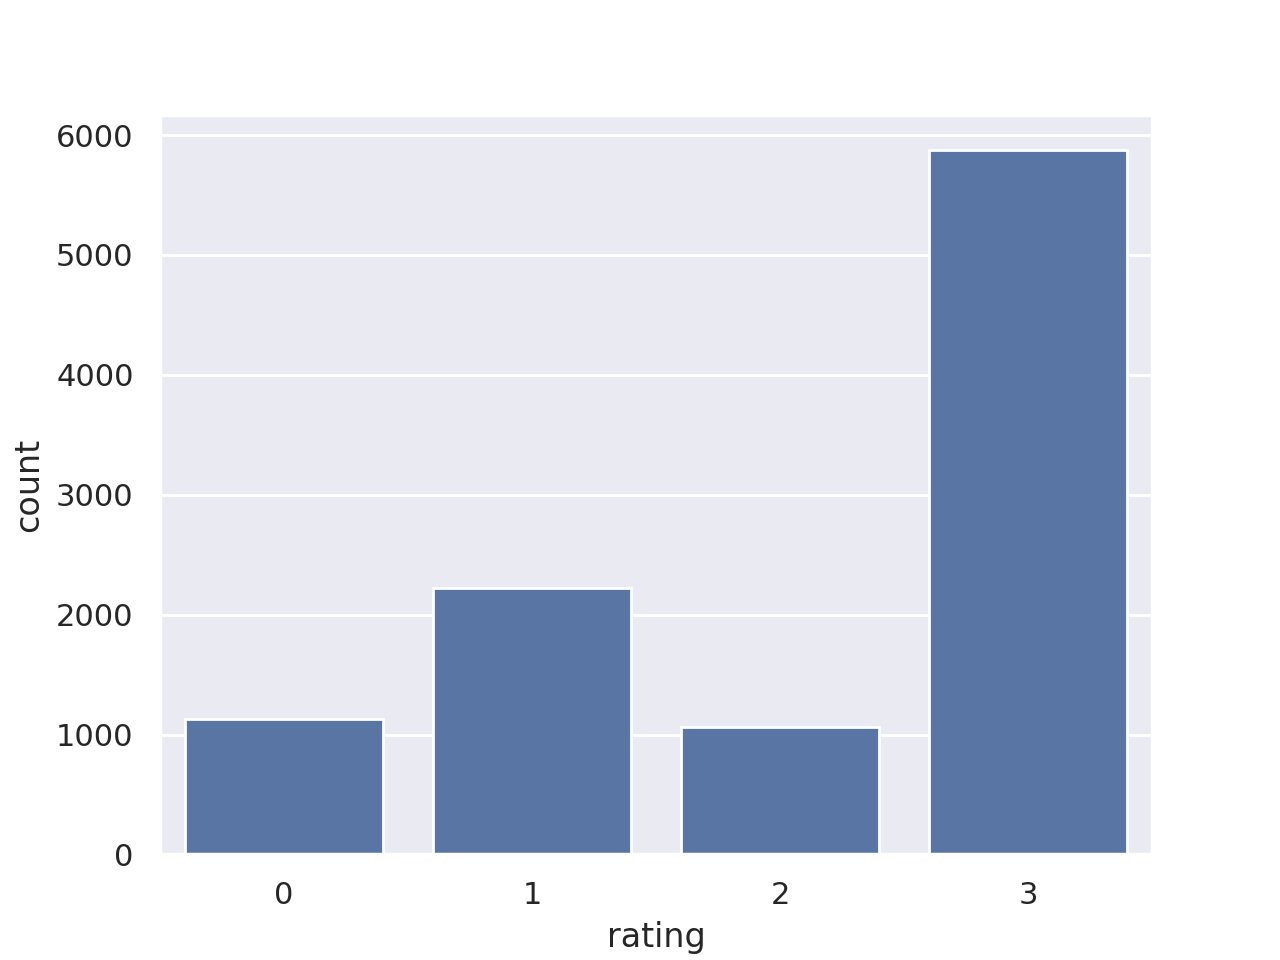

In [45]:
sns.countplot(x='rating', data = df)

<Axes: xlabel='year', ylabel='Density'>

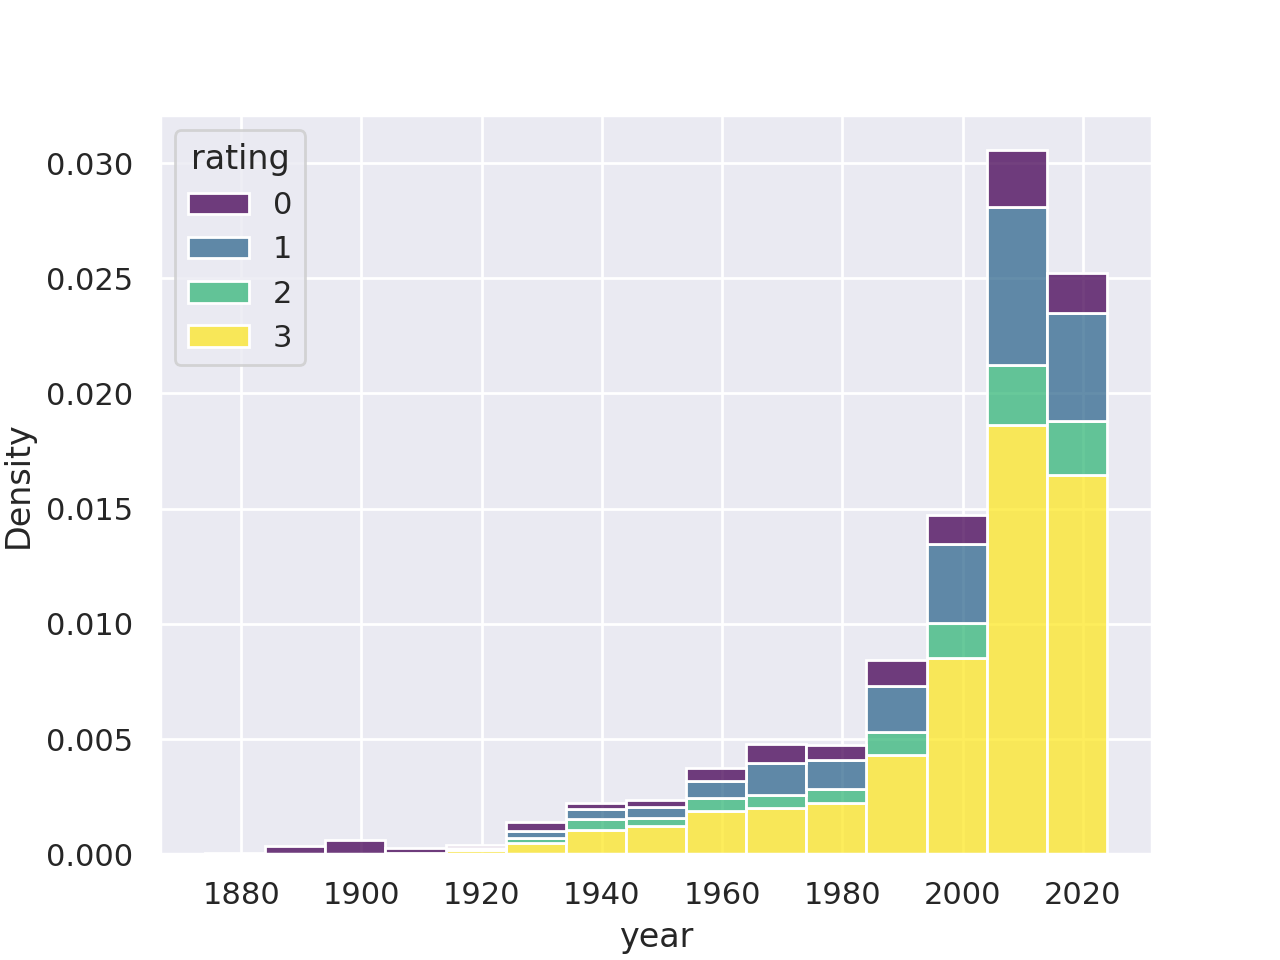

In [46]:
sns.histplot(data=df, x="year", hue="rating", stat="density", binwidth=10, multiple="stack", palette="viridis")

In [47]:
#from above histplot, we can observe that rating1, rating2, rating 3 are from the years 1930
df = df[df['year'] > 1930]

In [48]:
df.head()

year                    title  rating   imdbid    id
249  1931                        M       3  0022100   610
250  1931  M&auml;dchen in Uniform       3  0022183   628
251  1931              Night Nurse       3  0022208   636
252  1931             Frankenstein       1  0021884  1317
253  1931            Anna Christie       3  0020642  1327

In [49]:
df.rename(columns={'rating':'Bechdel Score'}, inplace=True)

In [50]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['Bechdel Score'] = df['Bechdel Score'].astype('category',copy=False)

In [51]:
li = []
for i in df['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
df['pass_test'] = li
df.head()

year                    title Bechdel Score   imdbid    id  \
249 1931-01-01                        M             3  0022100   610   
250 1931-01-01  M&auml;dchen in Uniform             3  0022183   628   
251 1931-01-01              Night Nurse             3  0022208   636   
252 1931-01-01             Frankenstein             1  0021884  1317   
253 1931-01-01            Anna Christie             3  0020642  1327   

     pass_test  
249          1  
250          1  
251          1  
252          0  
253          1

<Axes: xlabel='pass_test', ylabel='count'>

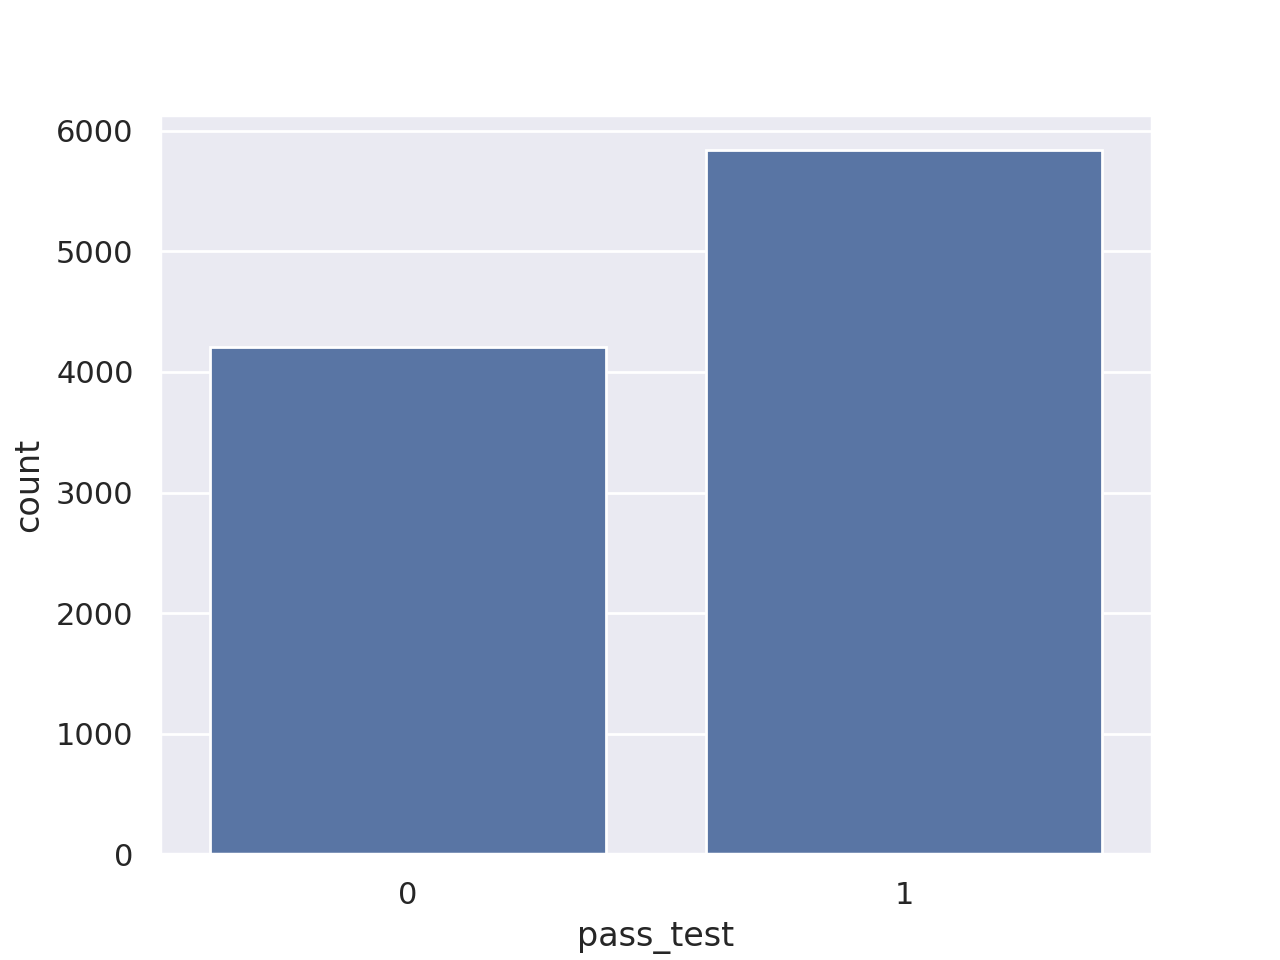

In [52]:
sns.countplot(x='pass_test',data=df)

In [53]:
# imports
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
py.init_notebook_mode()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

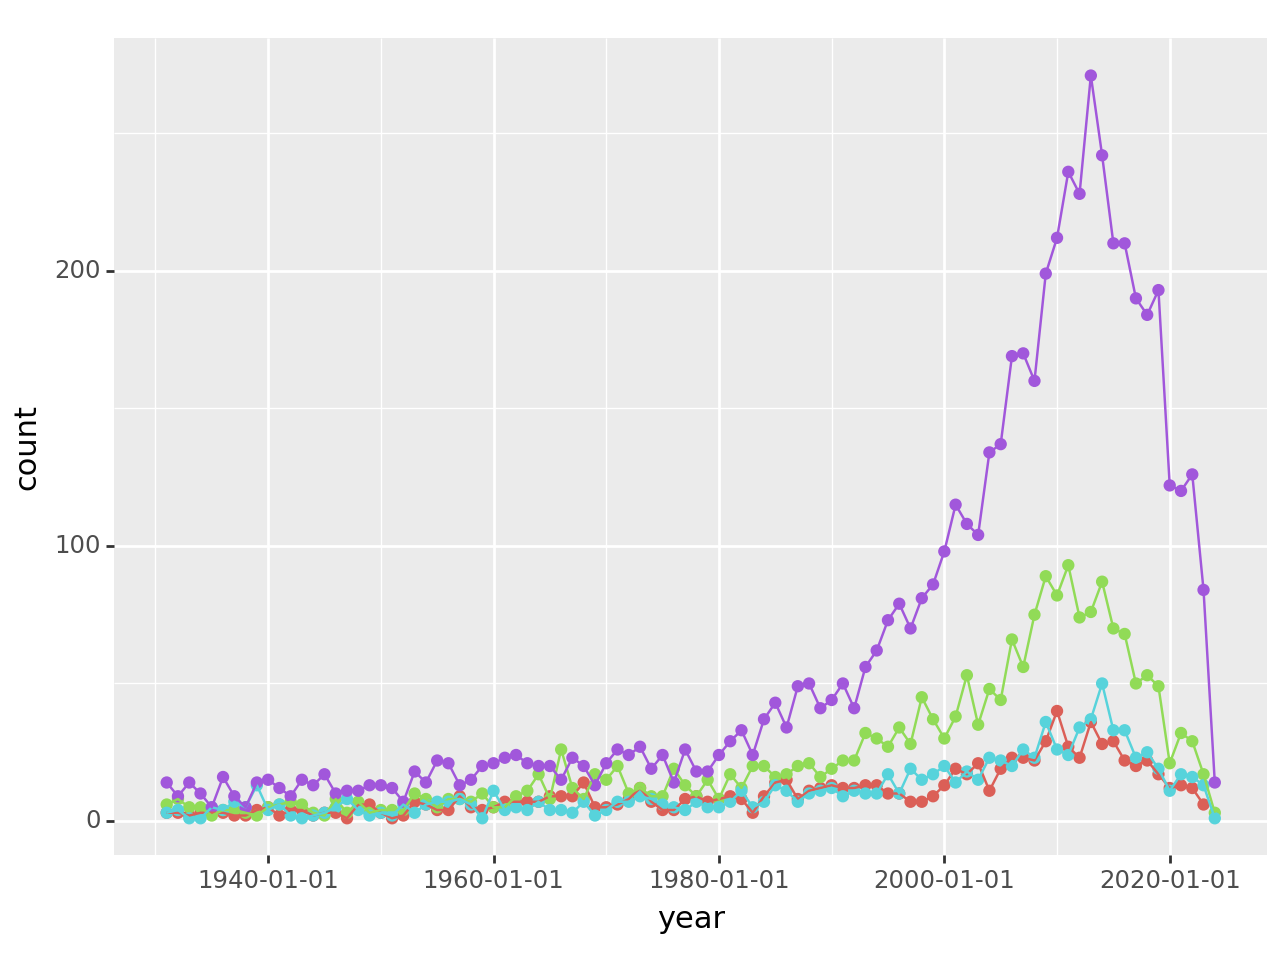

<Figure Size: (640 x 480)>

In [55]:
from plotnine import *

# Creating a ggplot object and specifying the data frame (dfNew)
ggplot(df)+geom_point(aes(x='year', color=df['Bechdel Score']), stat='count', show_legend=False)+geom_line(aes(x='year', color=df['Bechdel Score']), stat='count', show_legend=False)

In [56]:
imdb = pd.read_csv('movies.csv')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(df, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()

year                    title Bechdel Score   imdbid    id  pass_test  \
0 1931-01-01                        M             3  0022100   610          1   
1 1931-01-01                        M             3  0022100   610          1   
2 1931-01-01  M&auml;dchen in Uniform             3  0022183   628          1   
3 1931-01-01              Night Nurse             3  0022208   636          1   
4 1931-01-01             Frankenstein             1  0021884  1317          0   

   rating  
0     8.5  
1     6.8  
2     NaN  
3     6.6  
4     5.8

In [57]:
dfNew.isnull().sum()

year                0
title               0
Bechdel Score       0
imdbid              0
id                  0
pass_test           0
rating           6231
dtype: int64

In [58]:
dfNew = dfNew.dropna()

In [59]:
dfNew = dfNew.drop('id',axis =1)

In [60]:
dfNew.head()

year         title Bechdel Score   imdbid  pass_test  rating
0 1931-01-01             M             3  0022100          1     8.5
1 1931-01-01             M             3  0022100          1     6.8
3 1931-01-01   Night Nurse             3  0022208          1     6.6
4 1931-01-01  Frankenstein             1  0021884          0     5.8
5 1931-01-01  Frankenstein             1  0021884          0     7.9

In [61]:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()

year Bechdel Score    rating
0 1931-01-01             0  7.150000
1 1931-01-01             1  6.937500
2 1931-01-01             2  6.950000
3 1931-01-01             3  6.463636
4 1932-01-01             0  6.950000

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


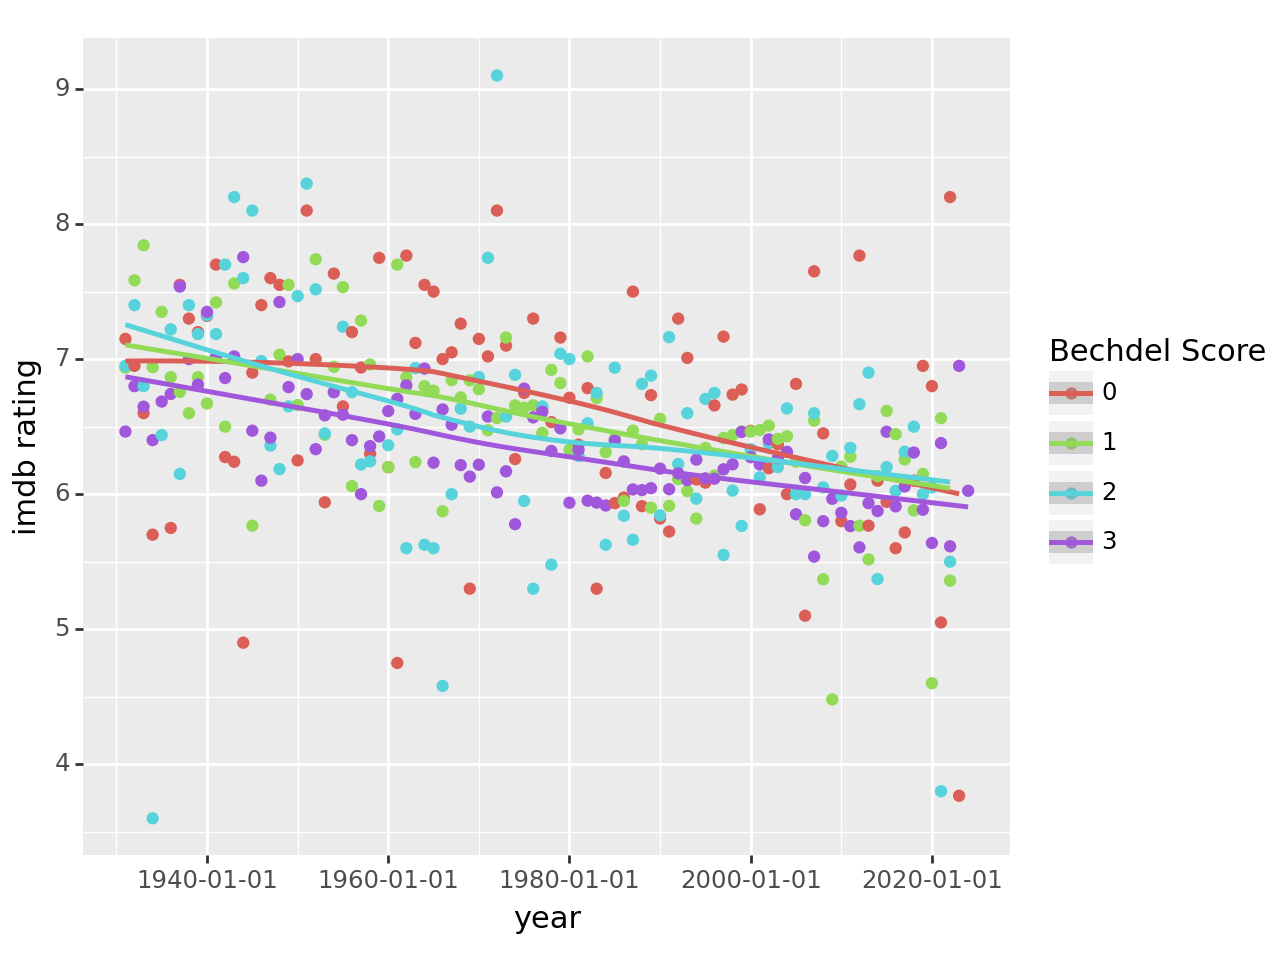

<Figure Size: (640 x 480)>

In [62]:
ggplot(new, aes(x='year', y='rating', color='Bechdel Score')) + geom_point() + geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )


In [63]:
!pip install gender_guesser
import gender_guesser.detector as gen
latest = pd.read_csv('movielatest.csv',encoding = "latin")
dfLatest = latest[['name','director']]
dfLatest.head()

name        director
0               Stand by Me      Rob Reiner
1  Ferris Bueller's Day Off     John Hughes
2                   Top Gun      Tony Scott
3                    Aliens   James Cameron
4   Flight of the Navigator  Randal Kleiser

In [64]:
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(dfNew, dfLatest, how = 'left', left_on=['title'], right_on=['title'])
dfLatest.head(10)

year          title Bechdel Score   imdbid  pass_test  rating director
0 1931-01-01              M             3  0022100          1     8.5      NaN
1 1931-01-01              M             3  0022100          1     6.8      NaN
2 1931-01-01    Night Nurse             3  0022208          1     6.6      NaN
3 1931-01-01   Frankenstein             1  0021884          0     5.8      NaN
4 1931-01-01   Frankenstein             1  0021884          0     7.9      NaN
5 1931-01-01   Frankenstein             1  0021884          0     6.0      NaN
6 1931-01-01  Anna Christie             3  0020642          1     7.2      NaN
7 1931-01-01  Anna Christie             3  0020642          1     6.6      NaN
8 1931-01-01  Anna Christie             3  0020642          1     7.3      NaN
9 1931-01-01      Mata Hari             3  0023196          1     6.8      NaN

In [65]:
dfLatest = dfLatest.dropna()
dfLatest.head()

year         title Bechdel Score   imdbid  pass_test  rating  \
60 1933-01-01     King Kong             0  0024216          0     7.9   
61 1933-01-01     King Kong             0  0024216          0     5.3   
62 1933-01-01  Little Women             3  0024264          1     6.7   
63 1933-01-01  Little Women             3  0024264          1     7.4   
64 1933-01-01  Little Women             3  0024264          1     7.0   

             director  
60      Peter Jackson  
61      Peter Jackson  
62  Gillian Armstrong  
63  Gillian Armstrong  
64  Gillian Armstrong

In [66]:
d = gen.Detector()
genders = []
firstnames = dfLatest['director'].str.split().str.get(0)
for i in firstnames:
    if d.get_gender(i) == 'male':
        genders.append('M')
    elif d.get_gender(i) == 'female':
        genders.append('F')
    else:
        genders.append('U')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'U']
dfLatest['Male'] = dfLatest['gender'].map( {'M':1, 'F':0} )
dfLatest.head()





year         title Bechdel Score   imdbid  pass_test  rating  \
60 1933-01-01     King Kong             0  0024216          0     7.9   
61 1933-01-01     King Kong             0  0024216          0     5.3   
62 1933-01-01  Little Women             3  0024264          1     6.7   
63 1933-01-01  Little Women             3  0024264          1     7.4   
64 1933-01-01  Little Women             3  0024264          1     7.0   

             director gender  Male  
60      Peter Jackson      M     1  
61      Peter Jackson      M     1  
62  Gillian Armstrong      F     0  
63  Gillian Armstrong      F     0  
64  Gillian Armstrong      F     0

<Axes: xlabel='gender', ylabel='count'>

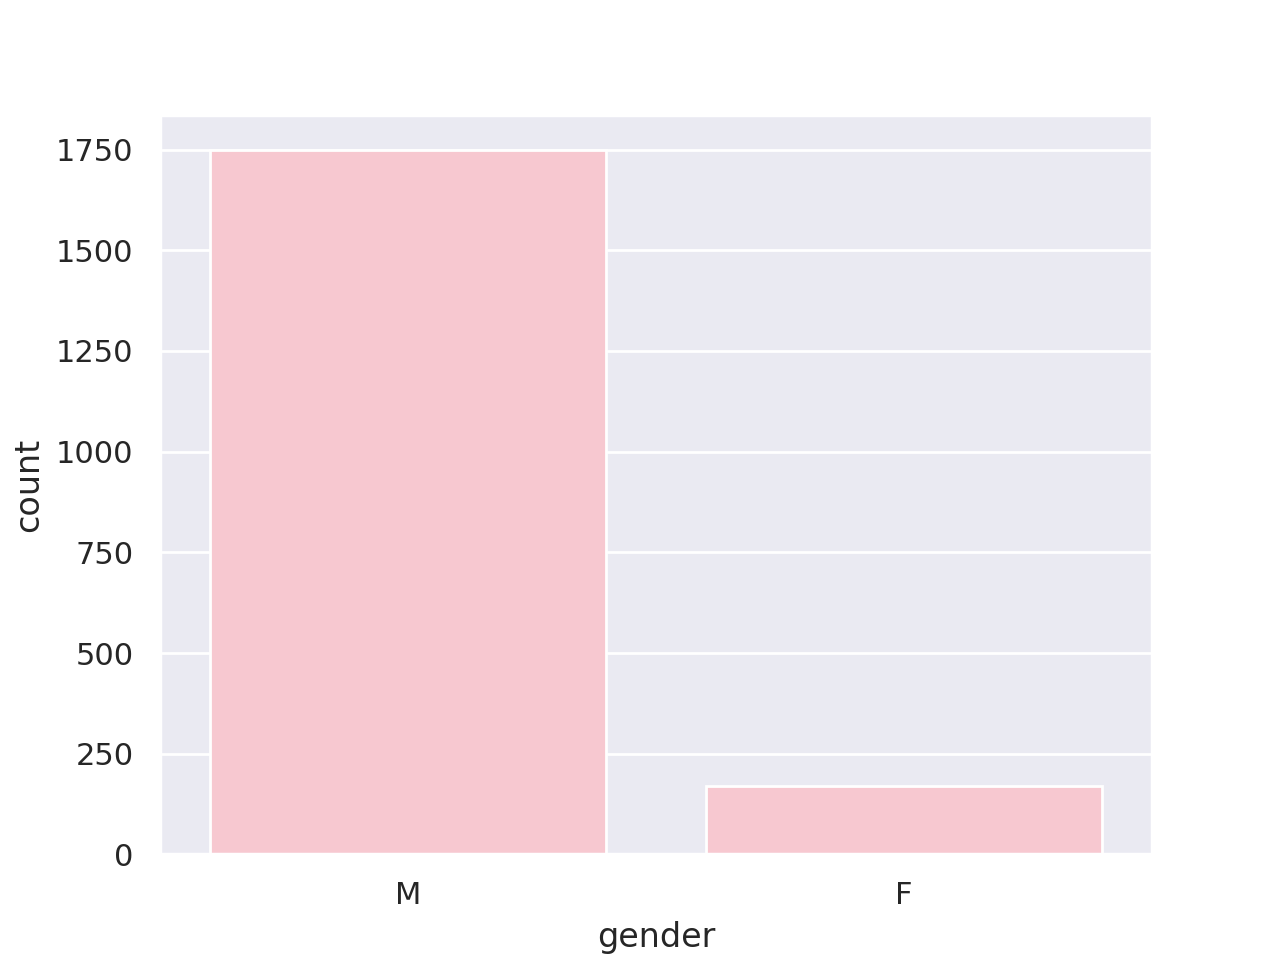

In [67]:
# Visualize gender:
sns.countplot(x='gender',data=dfLatest, color ='pink')

<Axes: xlabel='Bechdel Score', ylabel='count'>

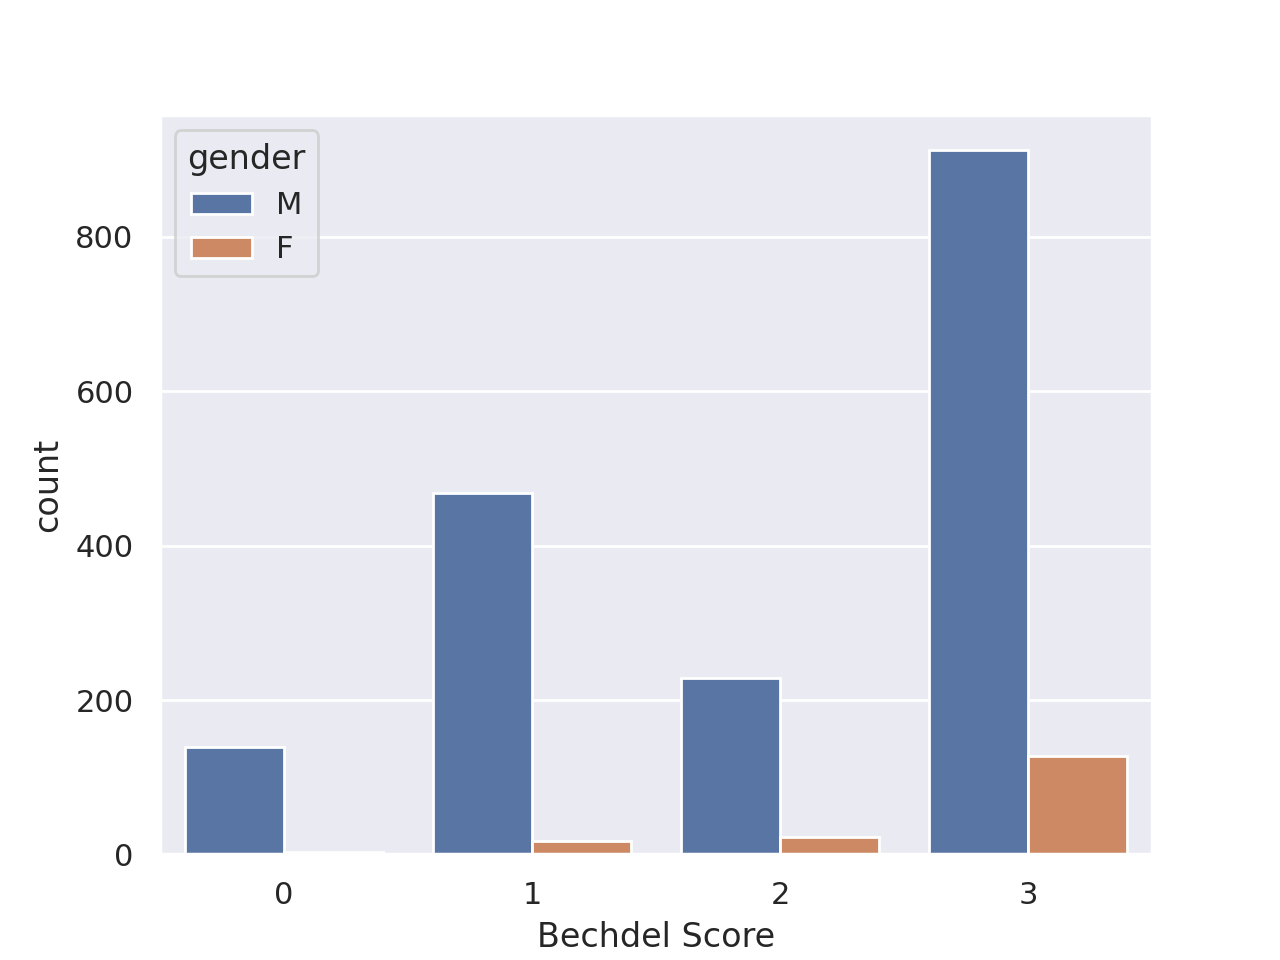

In [68]:
sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)

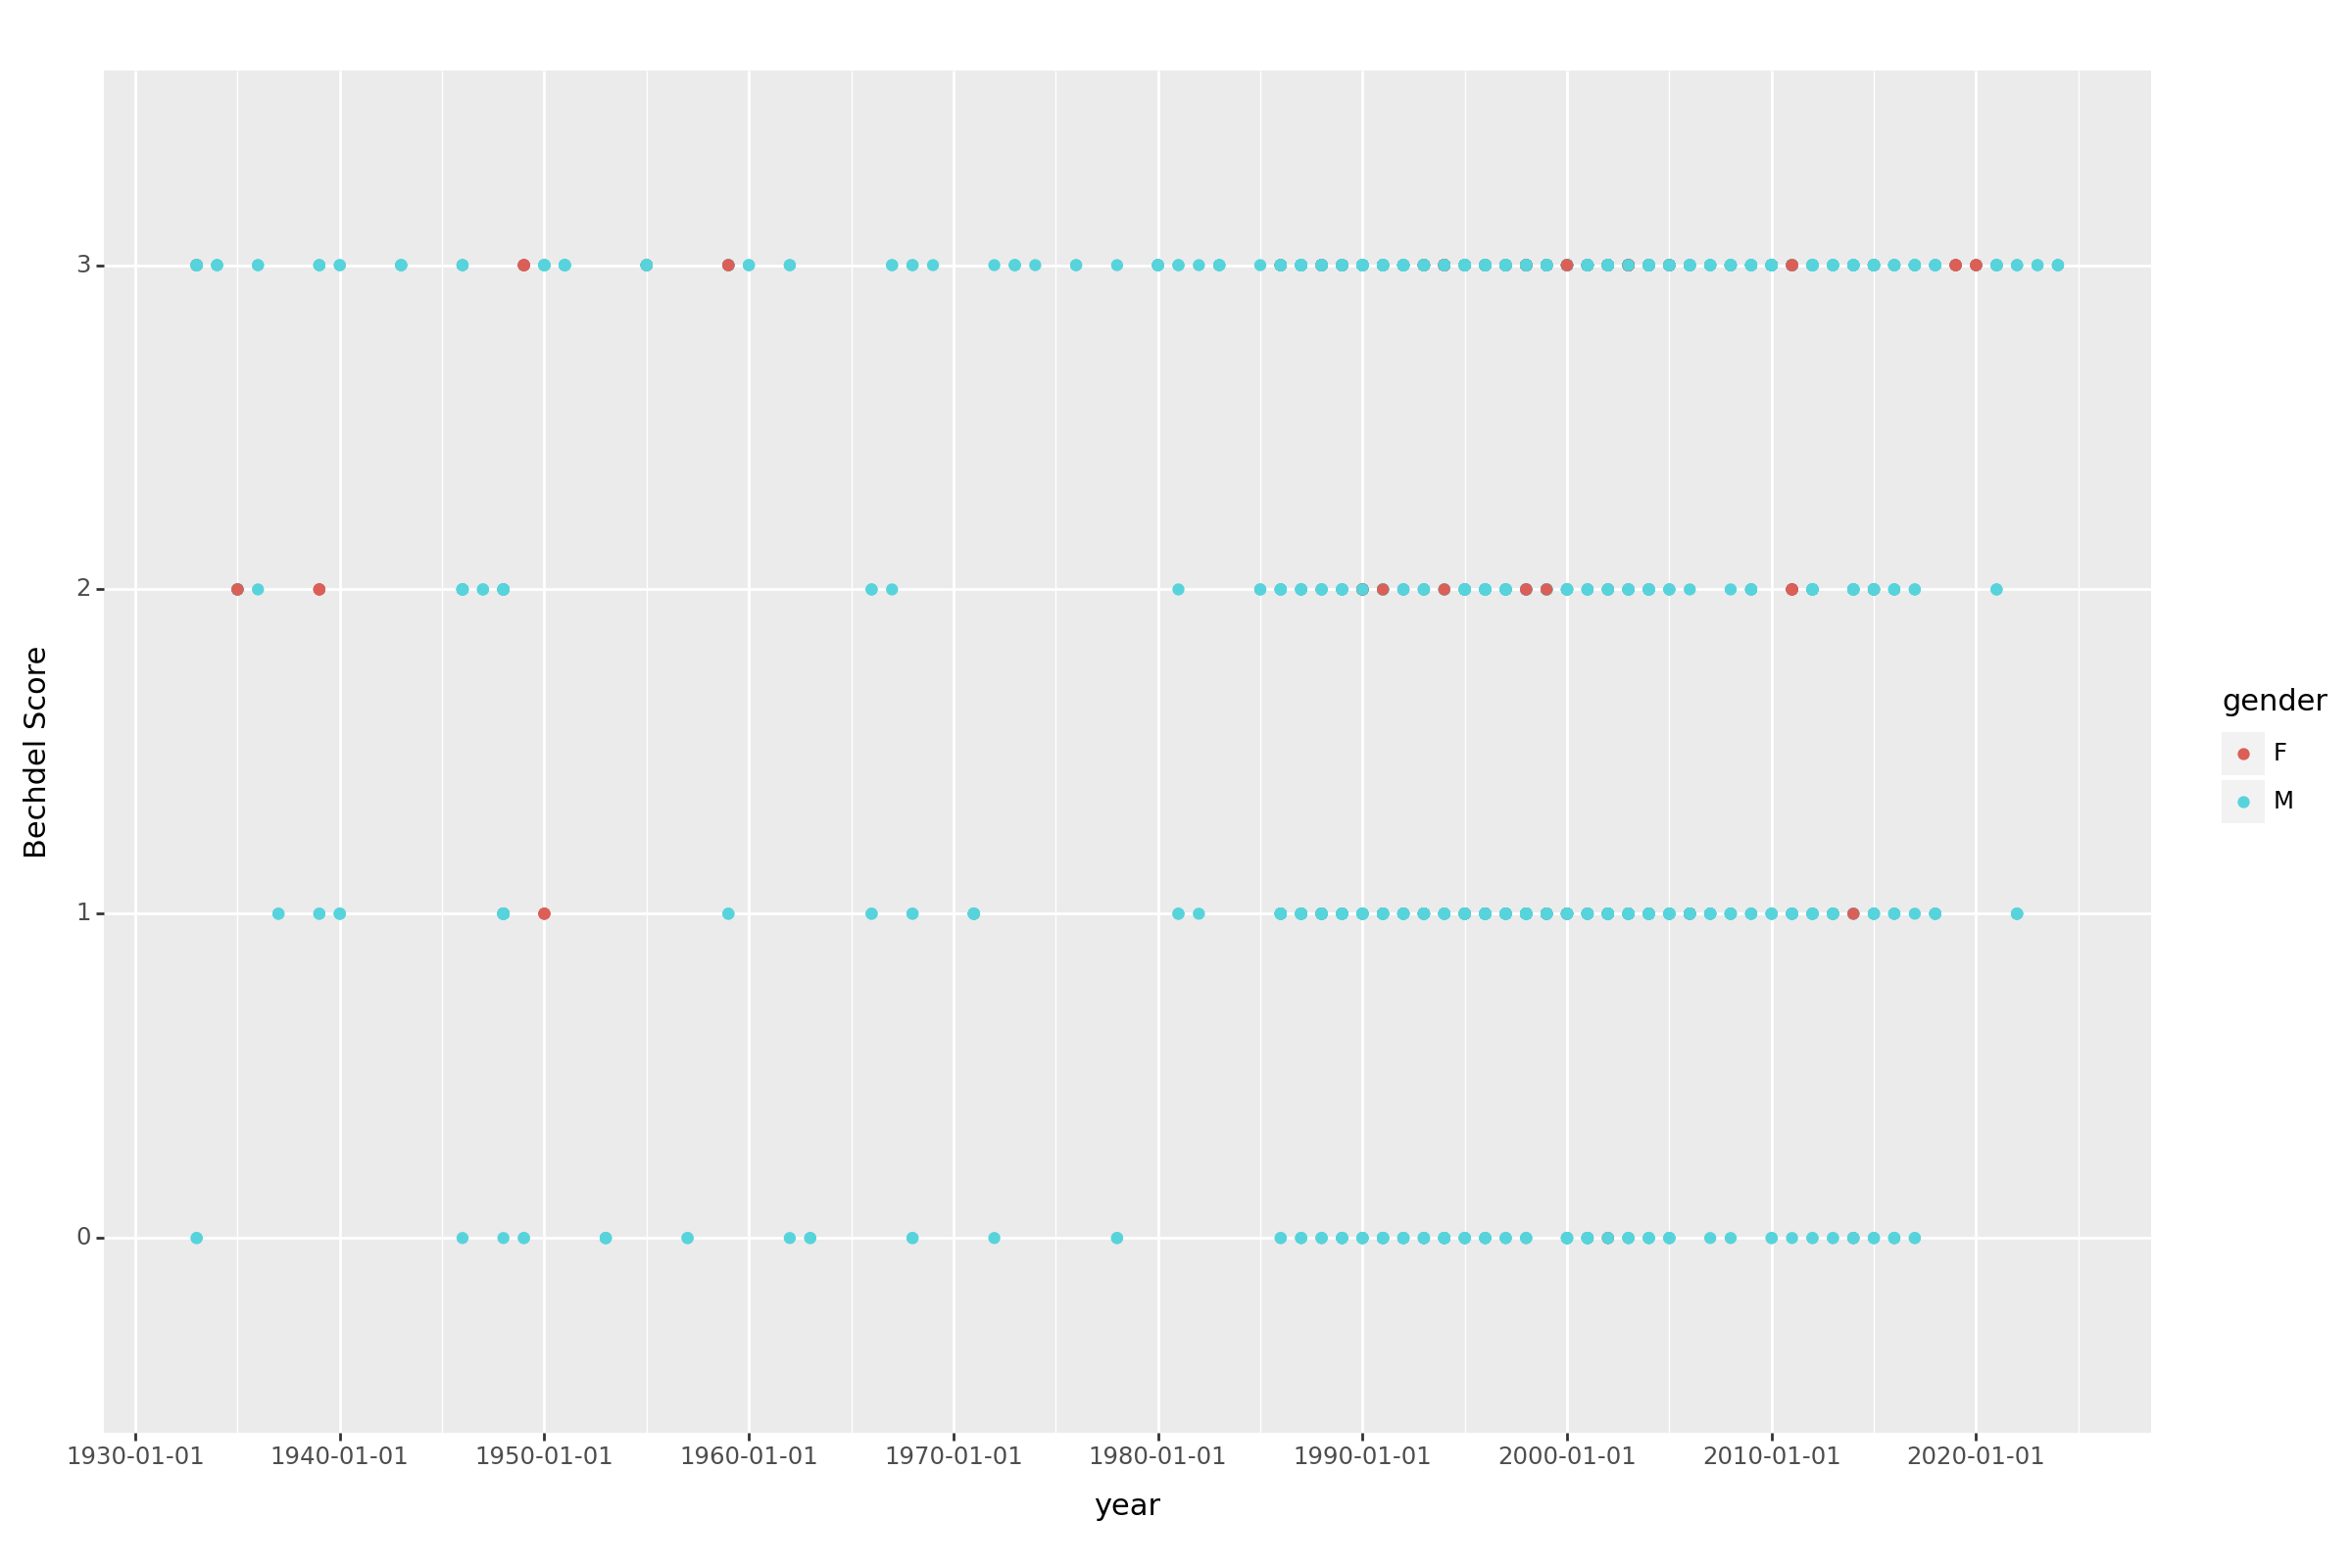

<Figure Size: (1200 x 800)>

In [86]:
ggplot(dfLatest,aes(x = 'year',y = 'Bechdel Score',color='gender'))+geom_point() + theme(figure_size=(12,8))


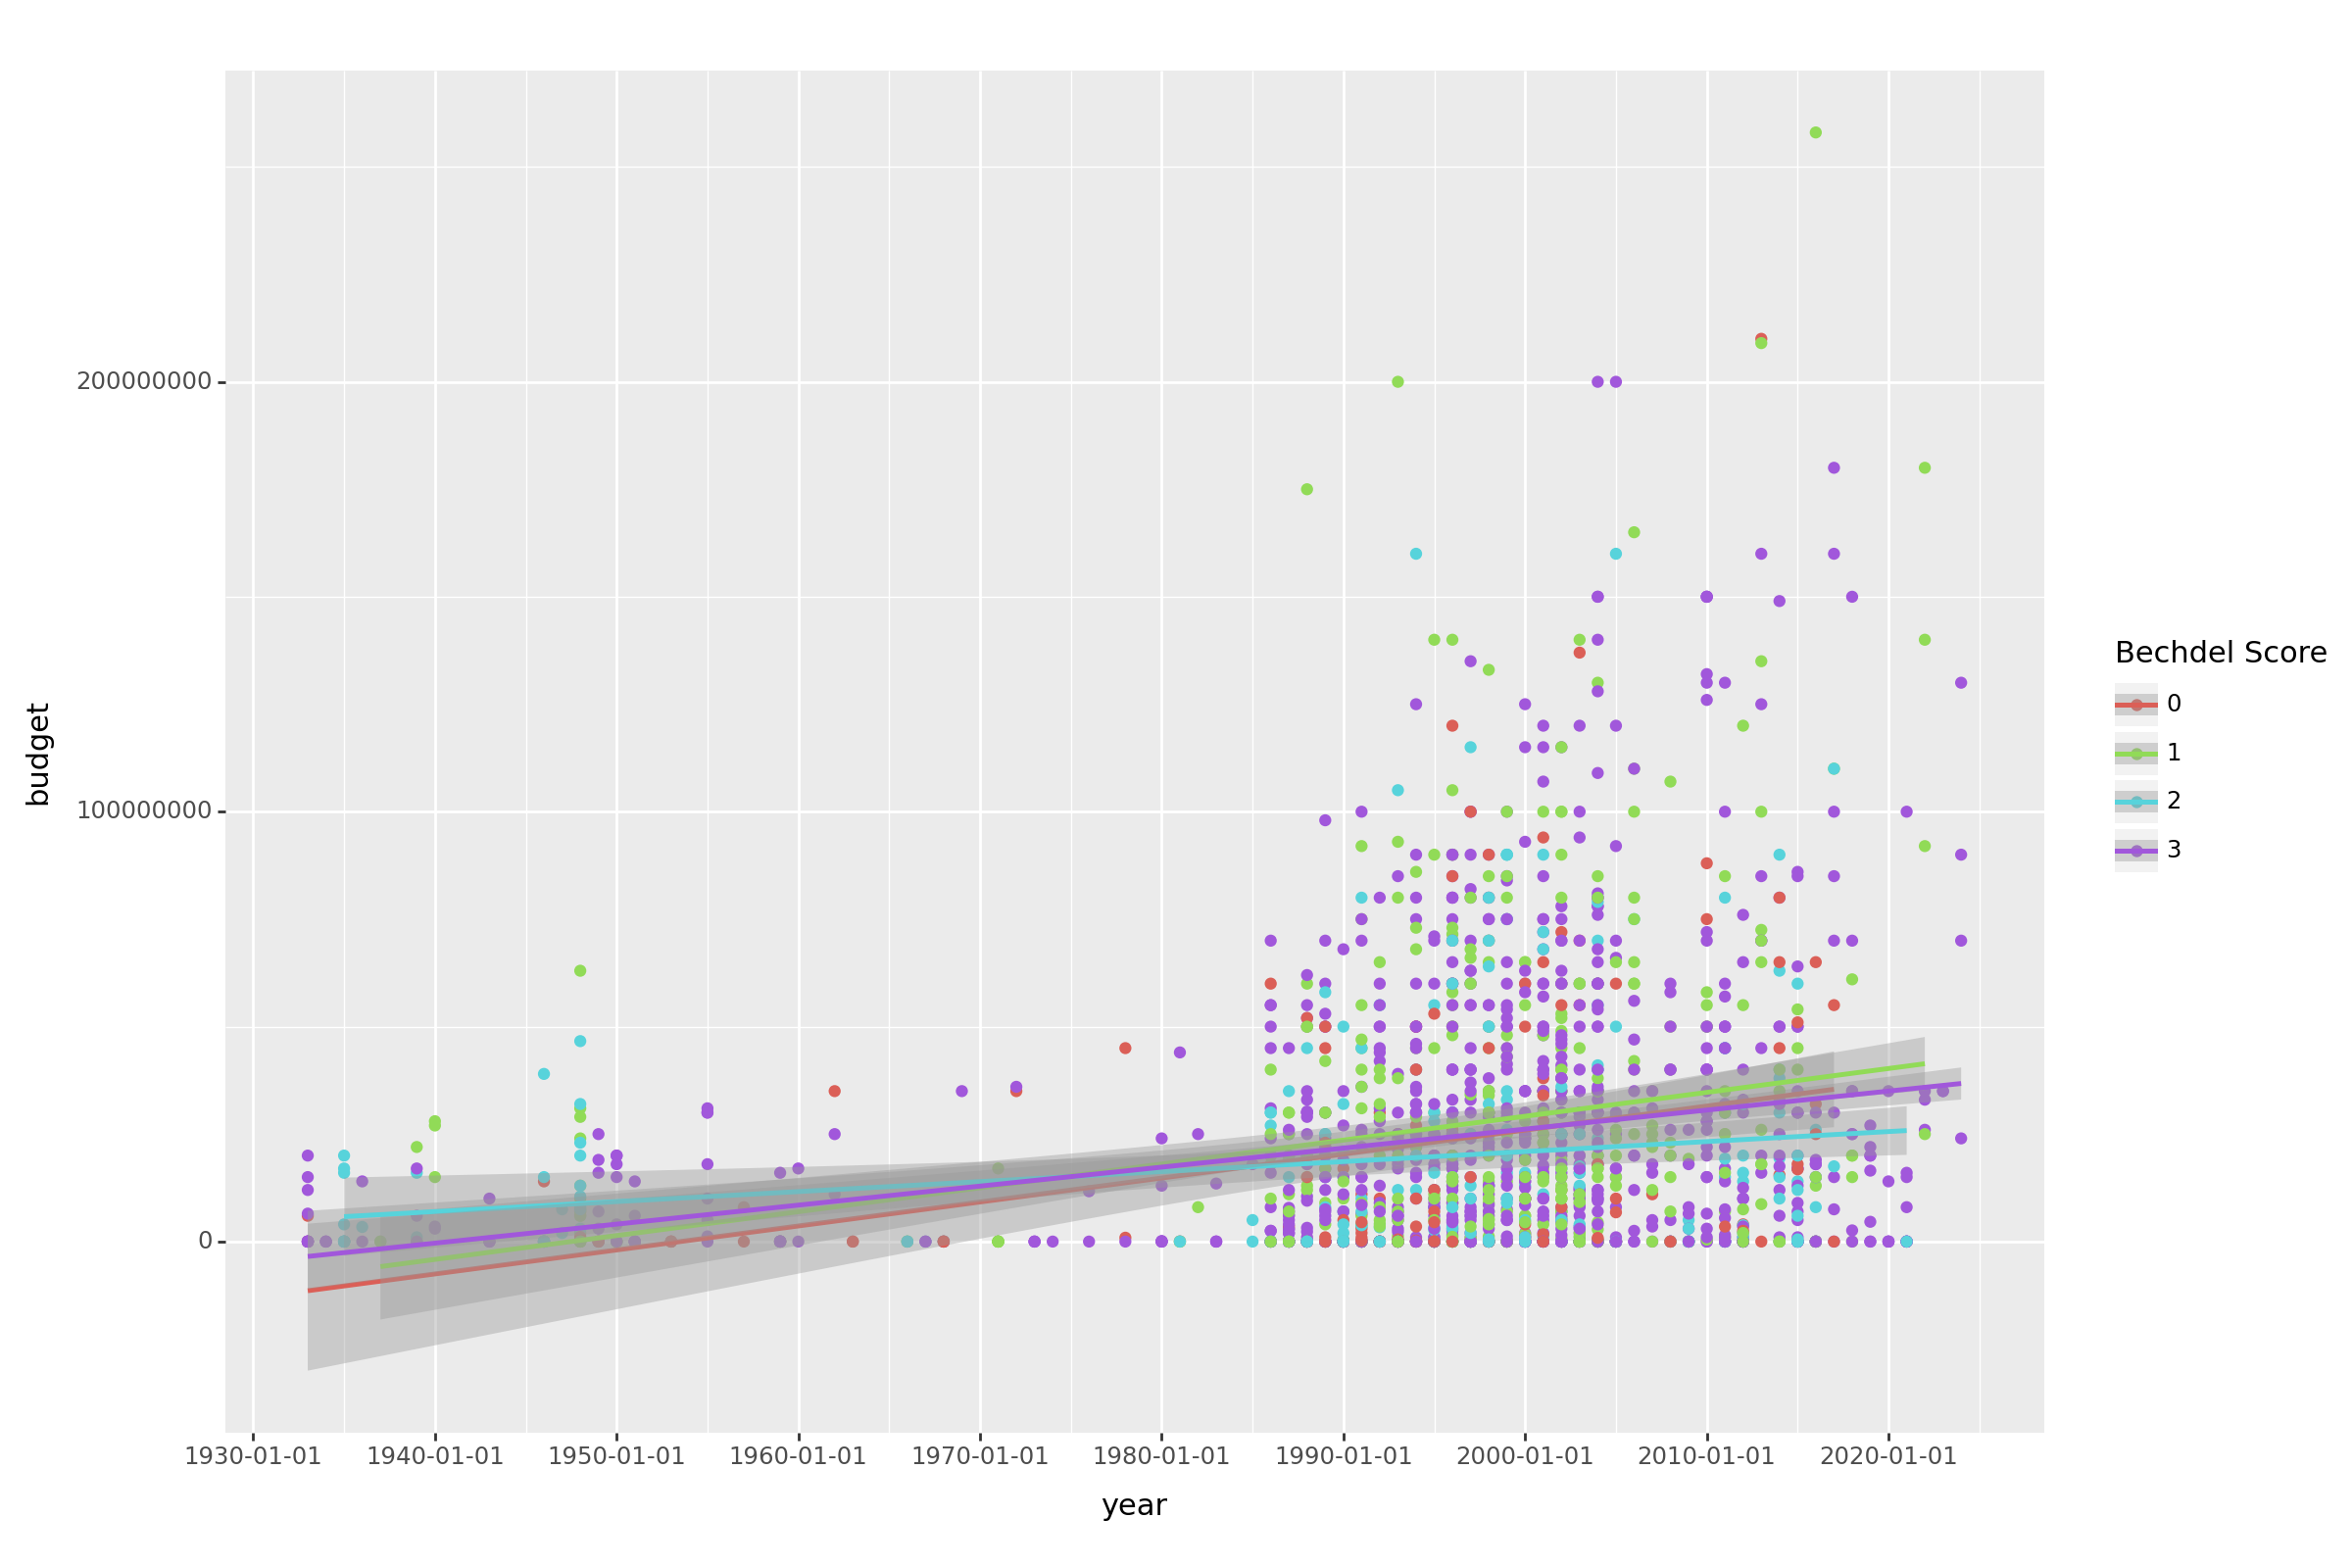

<Figure Size: (1200 x 800)>

In [73]:
=dfLatest['budget']=latest['budget']

ggplot(dfLatest,aes(x = 'year', y = 'budget',color='Bechdel Score'))+geom_point()+geom_smooth() +


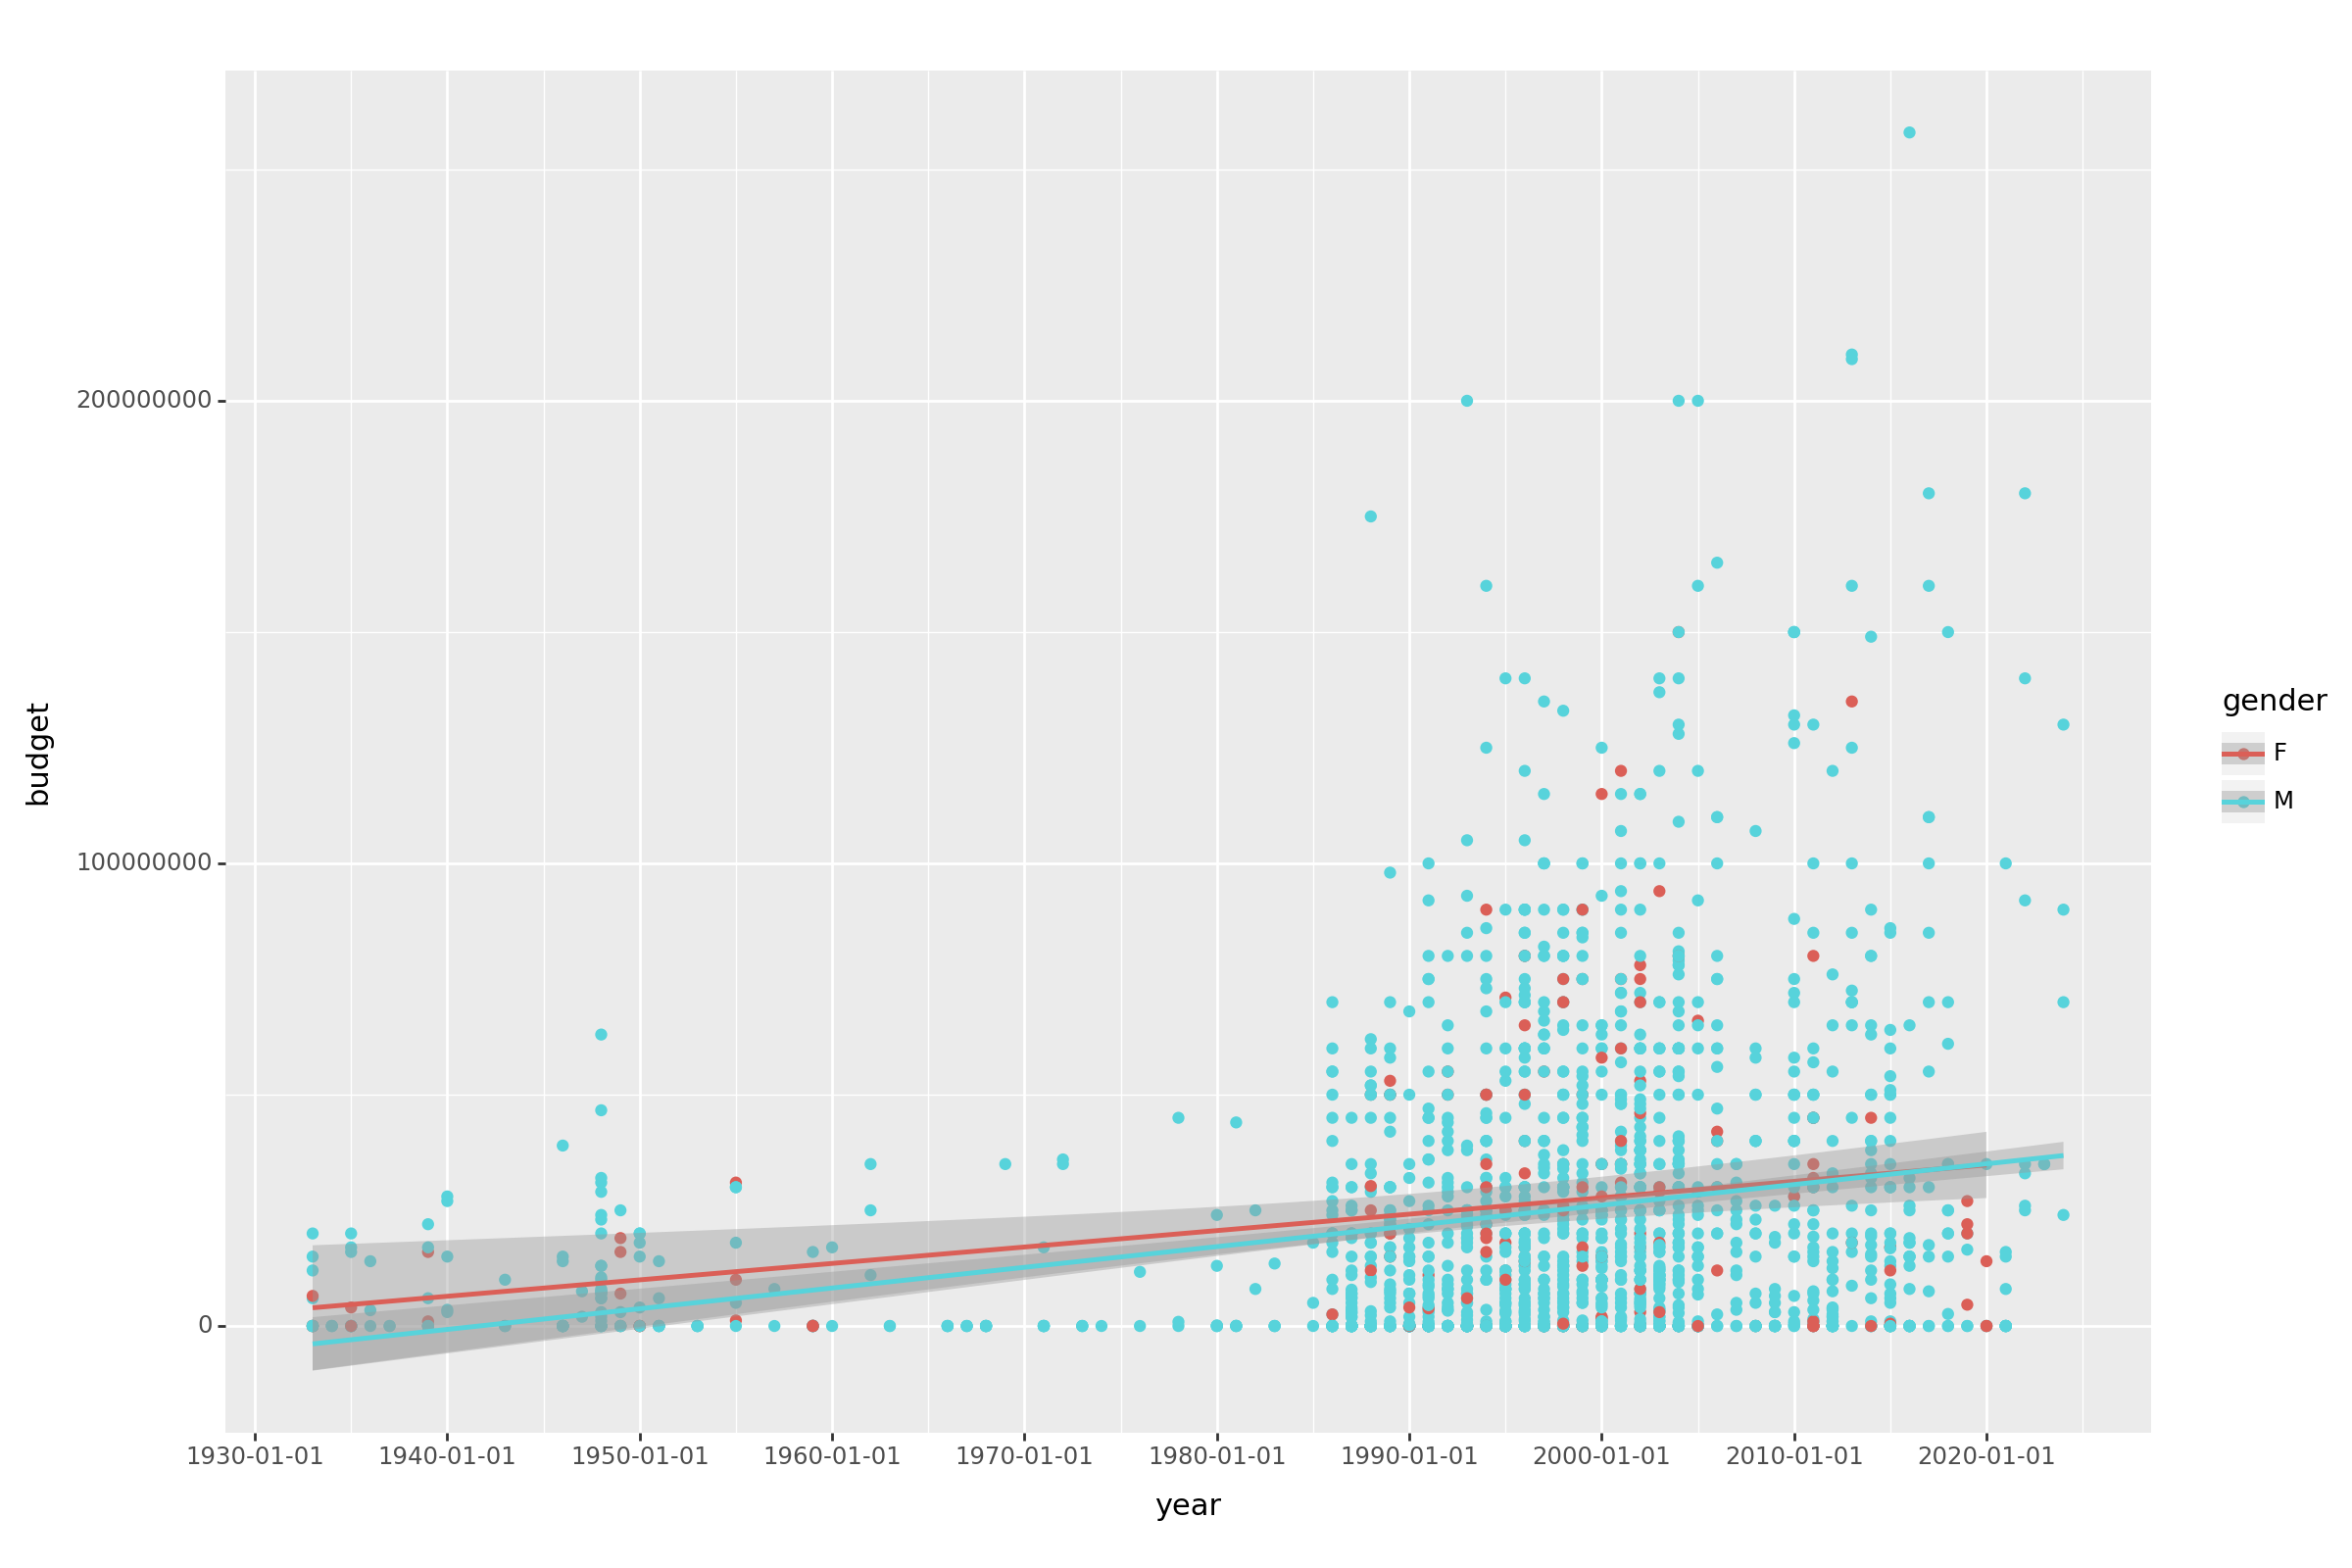

<Figure Size: (1200 x 800)>

In [77]:
ggplot(dfLatest,aes(x = 'year', y = 'budget',color='gender')) +geom_point()+geom_smooth() + theme(figure_size=(12,8))

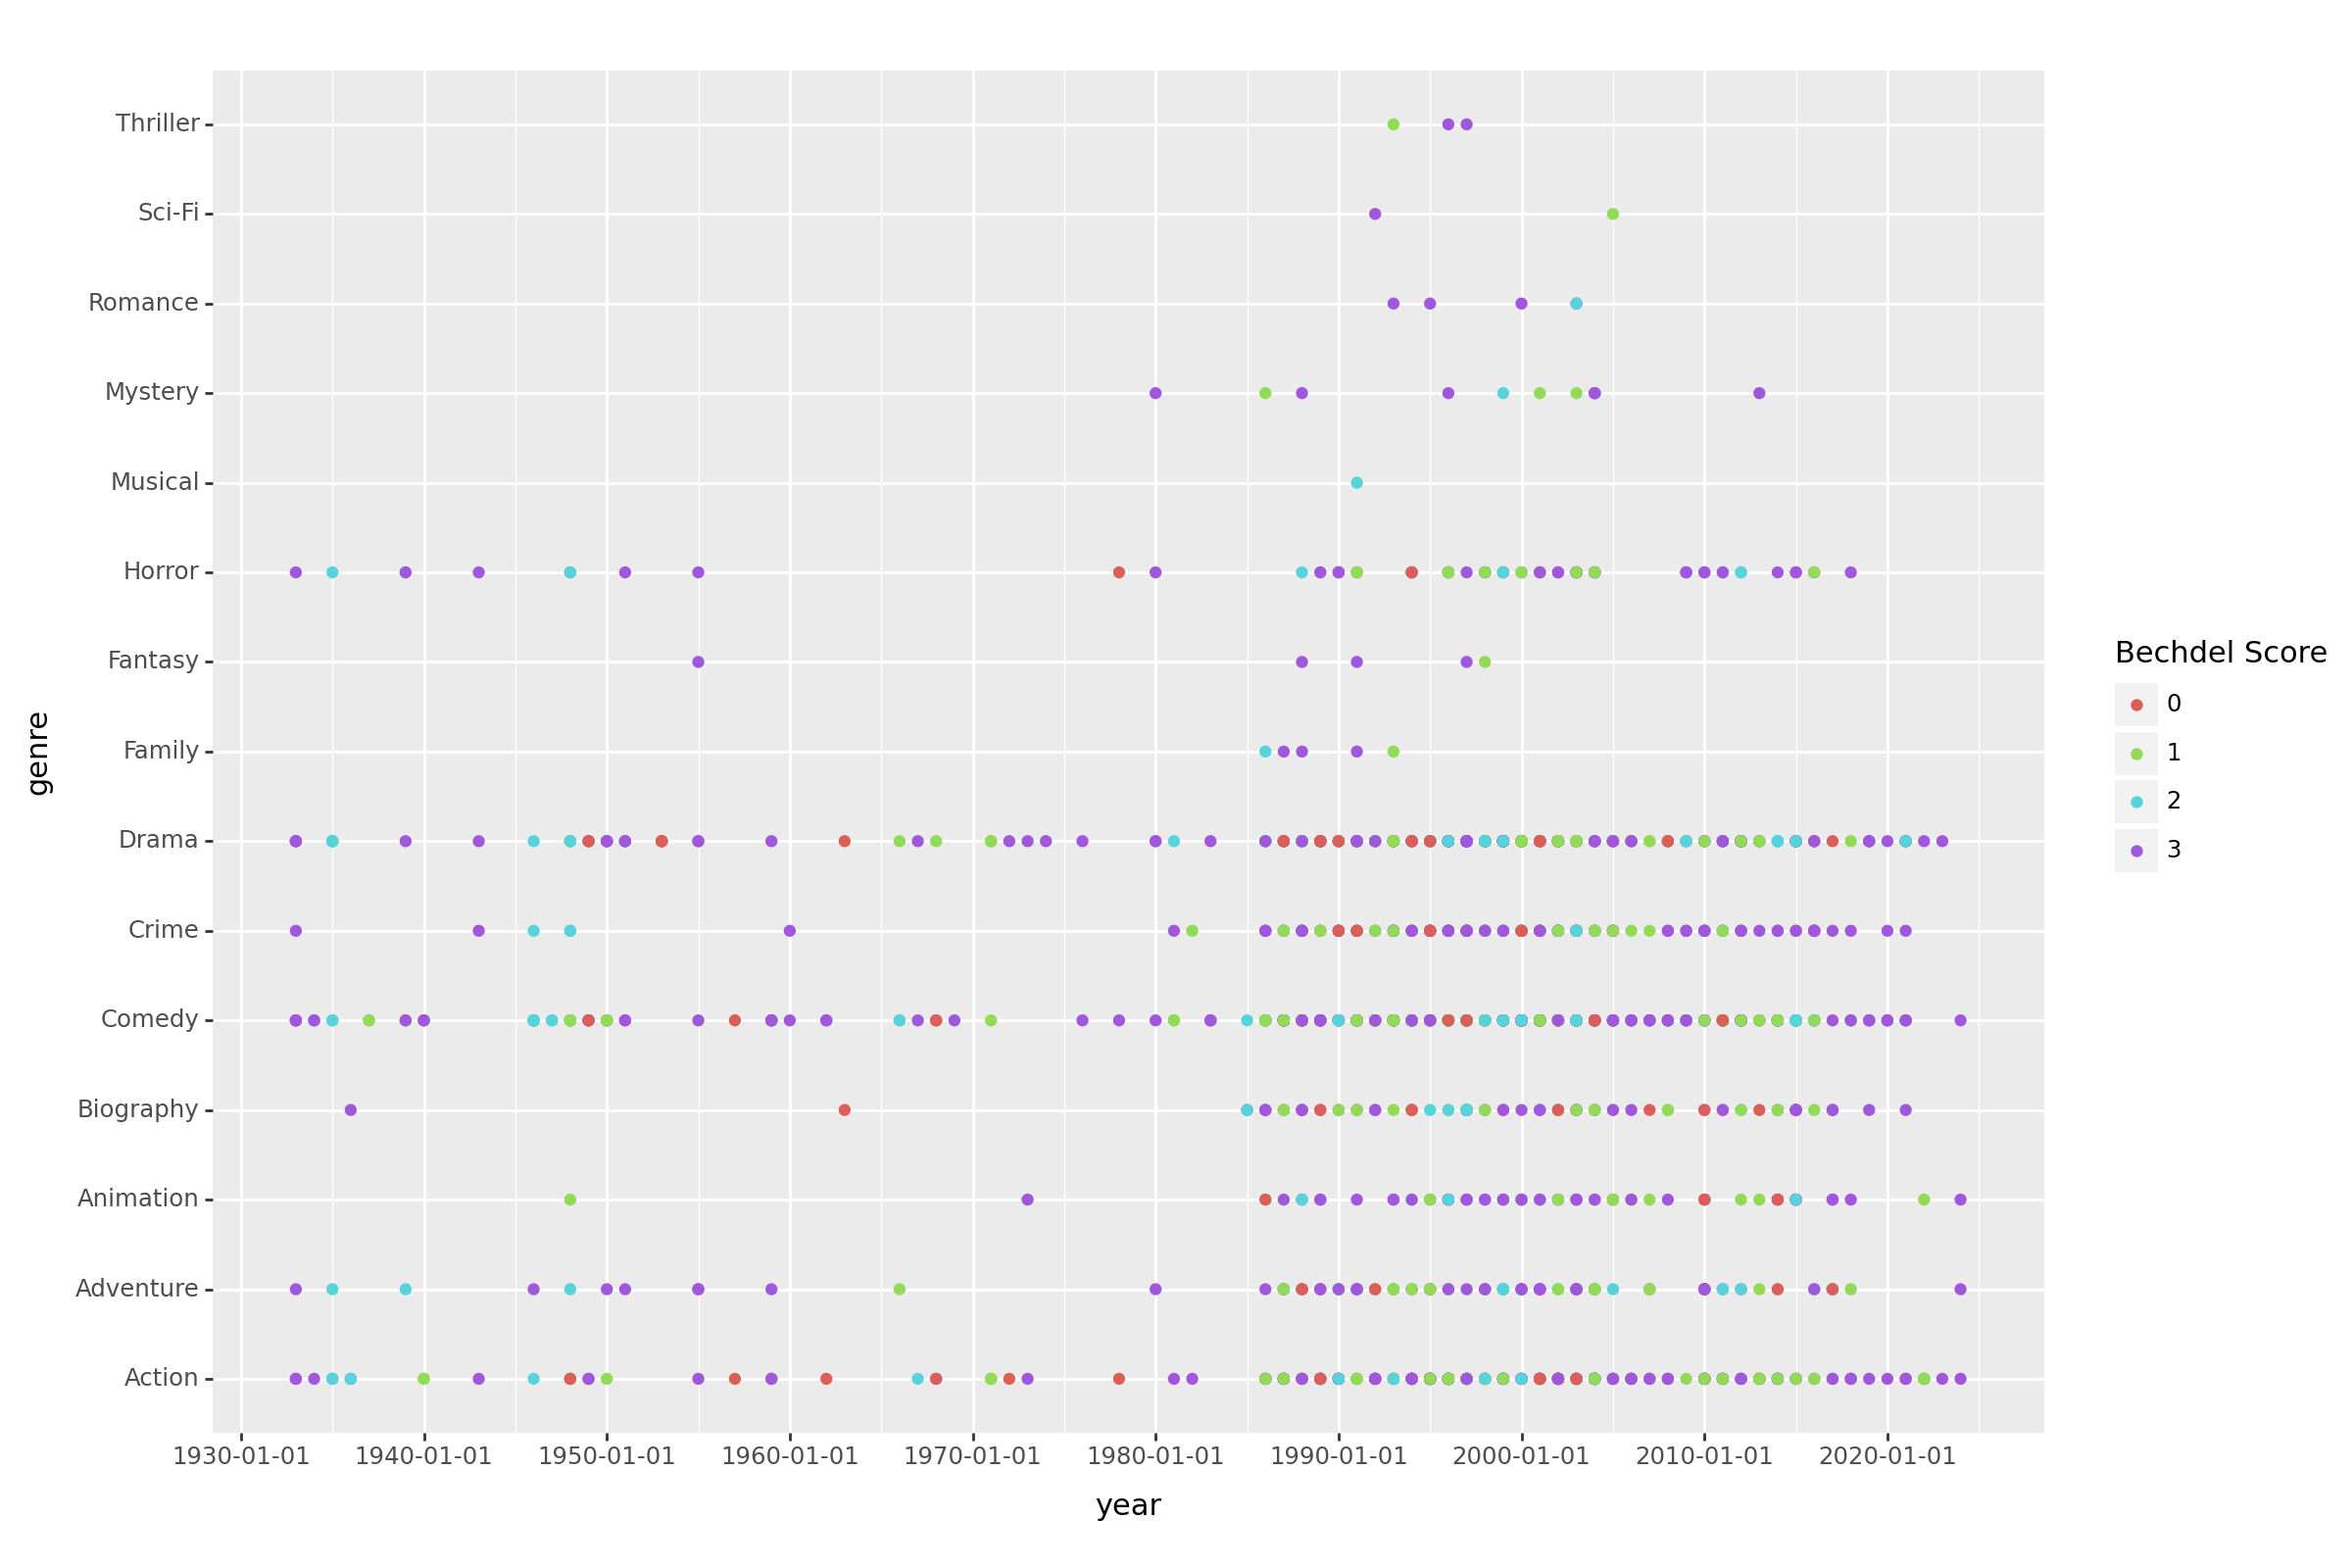

<Figure Size: (1200 x 800)>

In [79]:
# Visualize genre and Bechdel score

dfLatest['genre'] = latest['genre']
ggplot(dfLatest, aes(x = 'year', y = 'genre',color='Bechdel Score'))+geom_point() + theme(figure_size=(12,8))

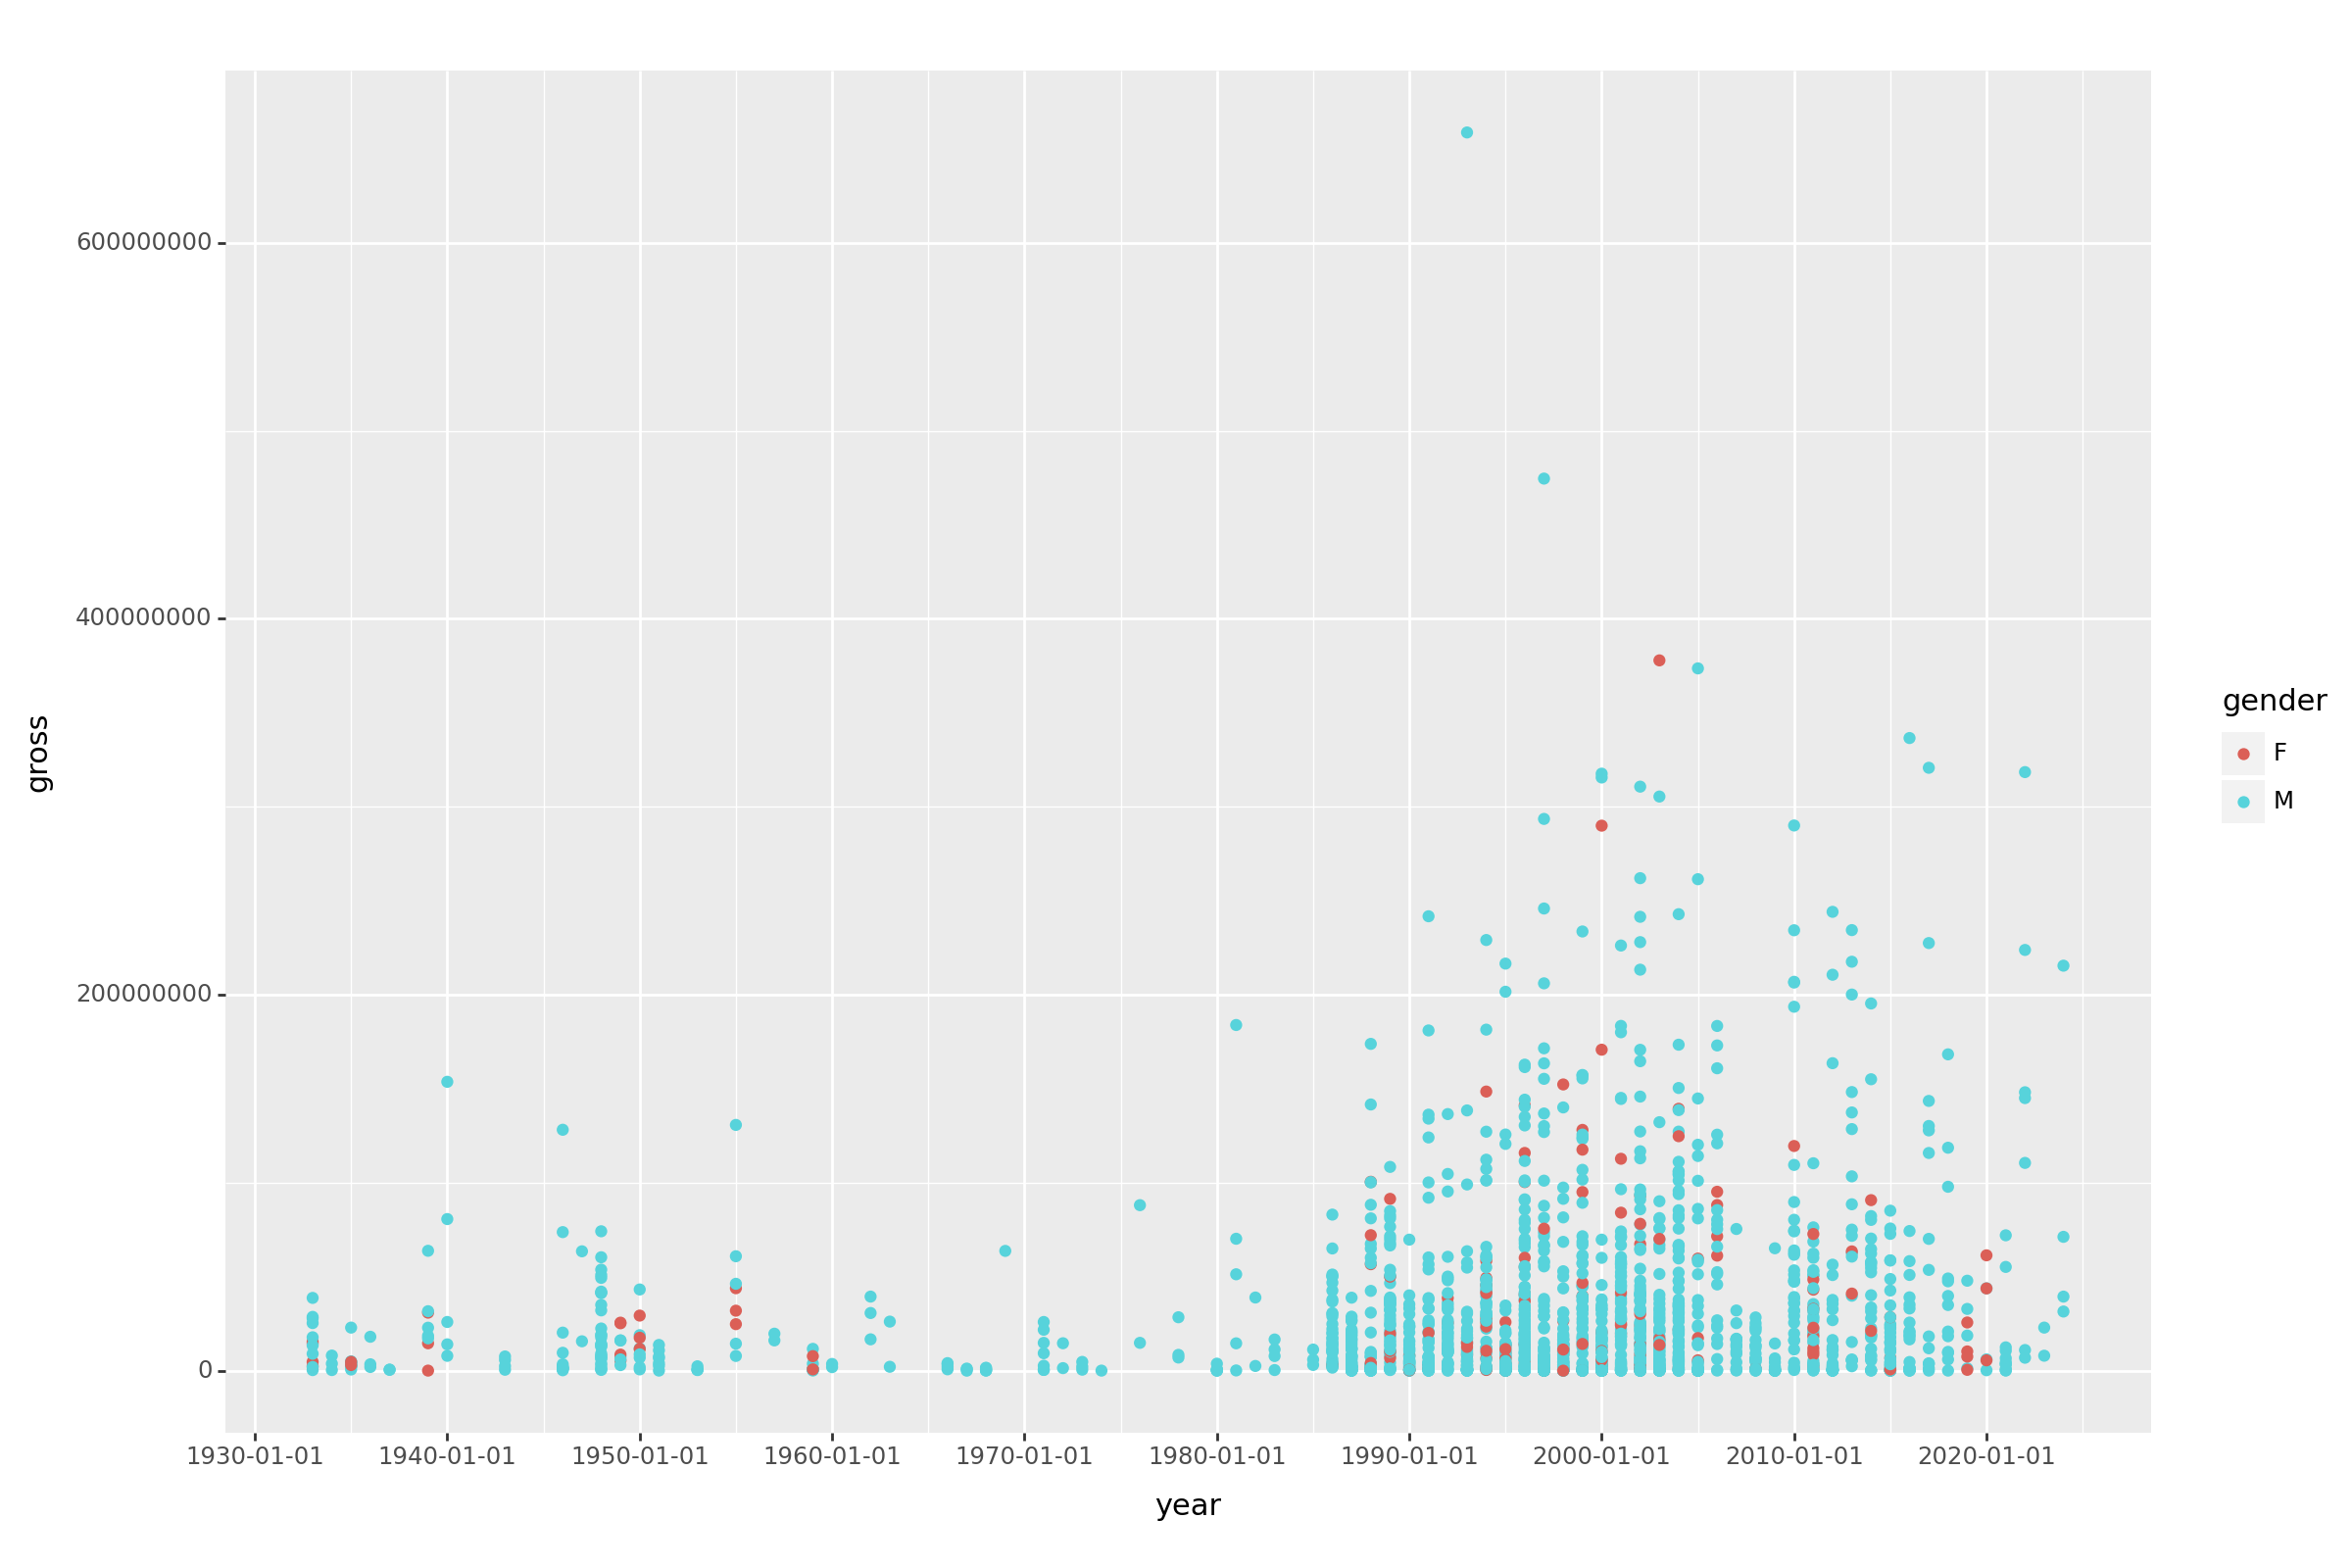

<Figure Size: (1200 x 800)>

In [84]:
dfLatest['gross'] = latest['gross']
ggplot(dfLatest,aes(x = 'year', y = 'gross',color='gender'))+geom_point() + theme(figure_size=(12,8))
